# Extracting Vaccination Data, Vaccination sites and number of sesssion data from the api link (Only available from 08-03-2021)

In [207]:
import datetime as datetime
from datetime import timedelta

import requests
import json

import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression   # Linear regression
from sklearn.preprocessing import PolynomialFeatures  # Polynomial regression
from sklearn.tree import DecisionTreeRegressor  # Decision tree regression


In [208]:

vaccine_data2=[]
vaccine_data_by_age2=[]
vaccine_sites2=[]
vaccine_sessions2=[]

def extract_data(start, end):
    while start<= end:
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_data1=r['topBlock']['vaccination'] #08March onwards data is there in the API
        vaccine_data2.append(vaccine_data1) #Storing the vaccine_0date in a list
        vaccine_sites1=r['topBlock']['sites'] #08March onwards data is there in the API
        vaccine_sites2.append(vaccine_sites1) #Storing the vaccine sites data in a list
        vaccine_sessions1=r['topBlock']['sessions'] #08March onwards data is there in the API
        vaccine_sessions2.append(vaccine_sessions1) #Storing the vaccine sessions in a list
        
        

In [209]:
vaccine_dataframe1=pd.DataFrame(vaccine_data2) # Converting into a dataframe

In [210]:
#replacing Not-a-Number value to 0

vaccine_dataframe1 = vaccine_dataframe1.replace(np.NaN, 0)
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1079517860,555122433,519974358,241941,952496712,121754589,2053029,740209218.0,339308642.0,1.079518e+09,...,696741.0,1356288.0,1018412.0,1034148.0,468.0,67.0,1087431.0,563093.0,200716.0,362377.0
243,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,341502896.0,1.082515e+09,...,734626.0,2085015.0,1401060.0,1417967.0,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0
244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,343176083.0,1.085078e+09,...,812572.0,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0
245,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,347388021.0,1.091116e+09,...,1755965.0,4119003.0,2941009.0,2932427.0,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0


#Creating the dates column to be added to the dataframe 

In [211]:
#https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
#https://docs.python.org/3/library/datetime.html


start_date = datetime.date(2021, 3, 8)   # start date
end_date = datetime.date.today()    # end date
time_diff=end_date-start_date  
dates_vaccine=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [212]:
dates_vaccine

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09'],
              dtype='datetime64[ns]', length=247, freq='D')

In [213]:
type(dates_vaccine)


pandas.core.indexes.datetimes.DatetimeIndex

In [214]:
#Adding the date column
vaccine_dataframe1['dates_vaccine']=dates_vaccine 

In [215]:
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1079517860,555122433,519974358,241941,952496712,121754589,2053029,740209218.0,339308642.0,1.079518e+09,...,1356288.0,1018412.0,1034148.0,468.0,67.0,1087431.0,563093.0,200716.0,362377.0,2021-11-05
243,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,341502896.0,1.082515e+09,...,2085015.0,1401060.0,1417967.0,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0,2021-11-06
244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,343176083.0,1.085078e+09,...,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0,2021-11-07
245,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,347388021.0,1.091116e+09,...,4119003.0,2941009.0,2932427.0,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0,2021-11-08


In [216]:
vaccine_dataframe1.insert(0, 'date_index', np.arange(0, len(vaccine_dataframe1)))

In [217]:
#Removing the last row because it has incomplete data

vaccine_dataframe = vaccine_dataframe1[1:-1]

vaccine_dataframe.set_index('date_index')

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
date_index,,,,,,,,,,,,,,,,,,,,,
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1077380188,554062044,518897565,241451,950537397,121577643,558913,739477582.0,337902606.0,1.077380e+09,...,359617.0,278372.0,280439.0,102.0,15.0,1086020.0,3083397.0,1197824.0,1885573.0,2021-11-04
242,1079517860,555122433,519974358,241941,952496712,121754589,2053029,740209218.0,339308642.0,1.079518e+09,...,1356288.0,1018412.0,1034148.0,468.0,67.0,1087431.0,563093.0,200716.0,362377.0,2021-11-05
243,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,341502896.0,1.082515e+09,...,2085015.0,1401060.0,1417967.0,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0,2021-11-06


In [218]:
#Storing the resultant dataframe into a csv file.
vaccine_dataframe.to_csv('vaccine_dataframe.csv')
vaccine_dataframe_excel = vaccine_dataframe.to_excel('vaccine_dataframe.xlsx')

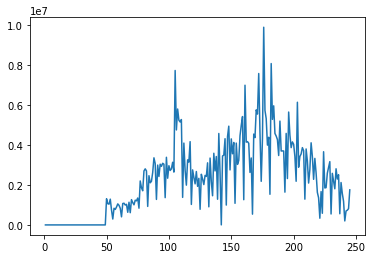

In [219]:
vaccine_dataframe['today_dose_one'].plot()

In [220]:
vaccine_dataframe = vaccine_dataframe.replace(np.NaN, 0)
vaccine_dataframe

,date_index,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
1,1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,1077380188,554062044,518897565,241451,950537397,121577643,558913,739477582.0,337902606.0,...,359617.0,278372.0,280439.0,102.0,15.0,1086020.0,3083397.0,1197824.0,1885573.0,2021-11-04
242,242,1079517860,555122433,519974358,241941,952496712,121754589,2053029,740209218.0,339308642.0,...,1356288.0,1018412.0,1034148.0,468.0,67.0,1087431.0,563093.0,200716.0,362377.0,2021-11-05
243,243,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,341502896.0,...,2085015.0,1401060.0,1417967.0,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0,2021-11-06
244,244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,343176083.0,...,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0,2021-11-07


In [221]:
first_c = vaccine_dataframe.pop('dates_vaccine')
vaccine_dataframe.insert(1, 'dates_vaccine', first_c)
vaccine_dataframe

#vaccine_dataframe.set_index('date_index')

,date_index,dates_vaccine,total,male,female,others,covishield,covaxin,today,tot_dose_1,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
1,1,2021-03-09,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-03-10,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-03-11,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-03-12,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-03-13,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,2021-11-04,1077380188,554062044,518897565,241451,950537397,121577643,558913,739477582.0,...,199296.0,359617.0,278372.0,280439.0,102.0,15.0,1086020.0,3083397.0,1197824.0,1885573.0
242,242,2021-11-05,1079517860,555122433,519974358,241941,952496712,121754589,2053029,740209218.0,...,696741.0,1356288.0,1018412.0,1034148.0,468.0,67.0,1087431.0,563093.0,200716.0,362377.0
243,243,2021-11-06,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,...,734626.0,2085015.0,1401060.0,1417967.0,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0
244,244,2021-11-07,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,...,812572.0,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0


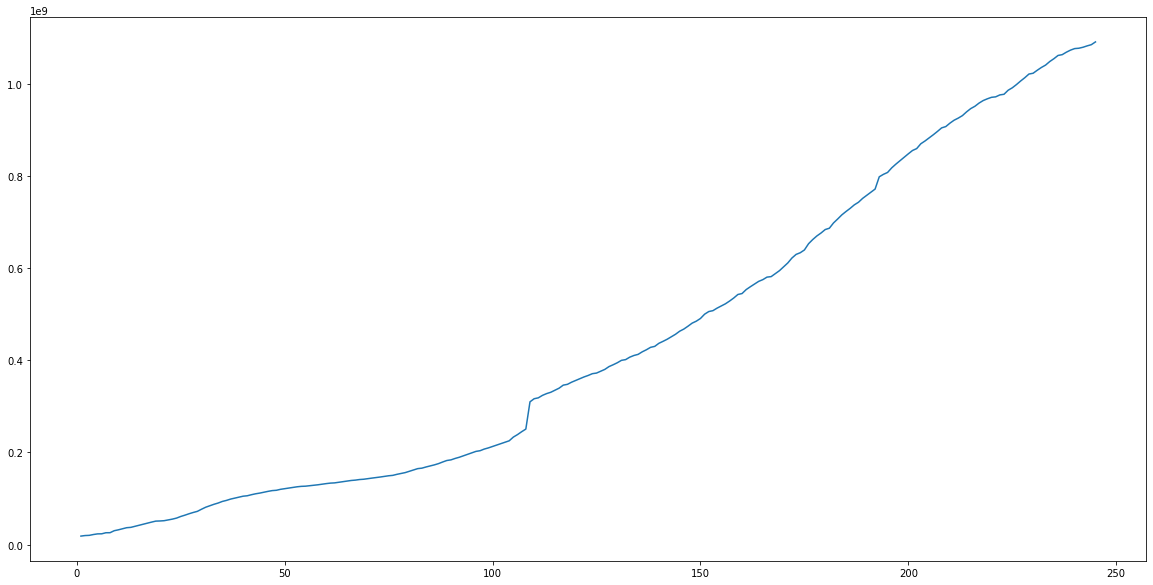

In [222]:
vaccine_dataframe['total'].plot(figsize = (20,10))

In [223]:
X = vaccine_dataframe[['tot_dose_2']]
y = vaccine_dataframe[['date_index']]

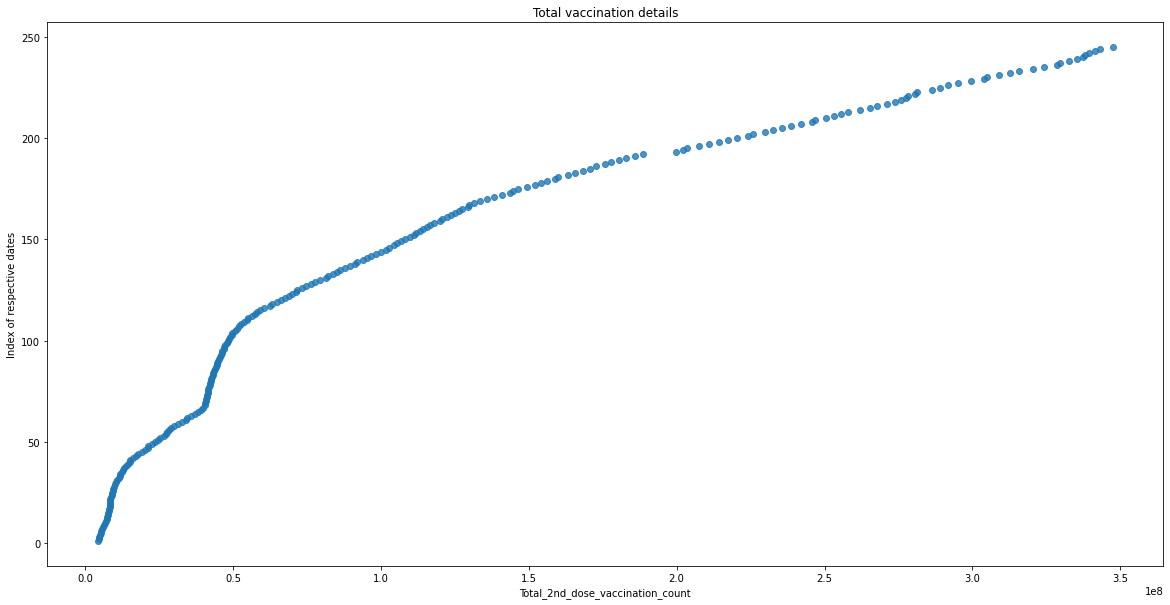

In [224]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.8)
plt.title('Total vaccination details')
plt.xlabel('Total_2nd_dose_vaccination_count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [225]:
y.shape


(245, 1)

In [226]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [227]:
m = regression.coef_  
m = float(m)
m

6.657614539791726e-07

In [228]:
c = regression.intercept_
c = float(c)
c

50.019521784624956

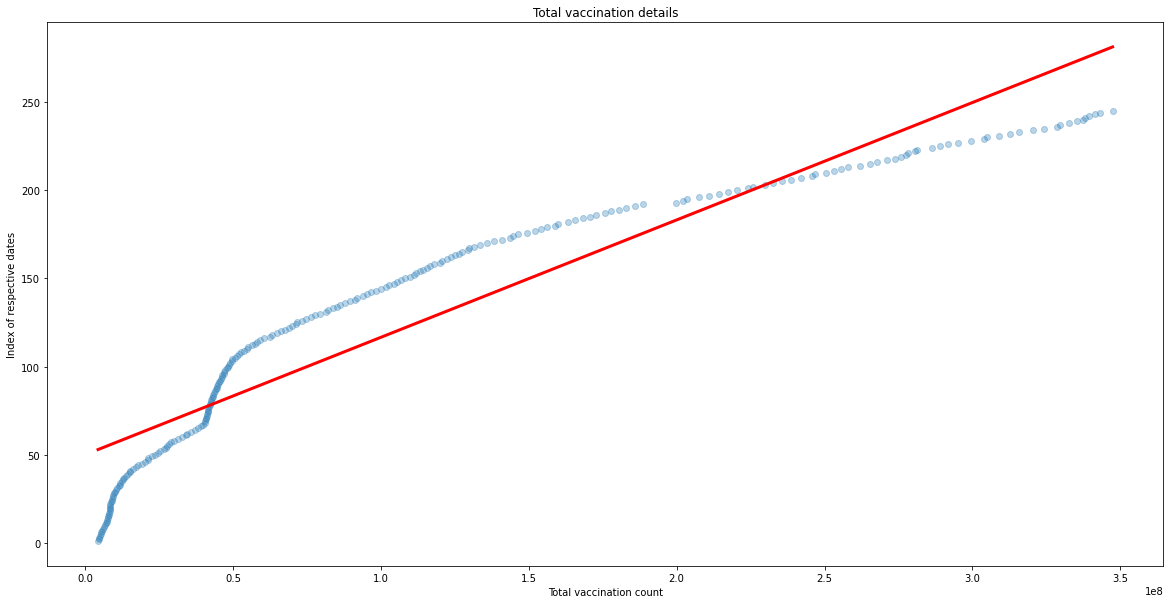

In [229]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)


plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [230]:
regression.score(X, y)

0.8806296836388026

In [231]:
# mathematical formula for prediction 
# For Linear model:  y = mx + c (y = date_index, x = population of India, m = slop, c = intercept)
# x = 1,402,000,000

In [232]:
x0 = 958174818

In [233]:
y0 = (m*x0) + c

In [234]:
y0

687.9353817825341

In [235]:
# Date for fully vaccination
fully_vaccination_date = start_date + timedelta(y0)
fully_vaccination_date

datetime.date(2023, 1, 24)

In [236]:
# Prediction using polynomial regression

In [237]:
polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(X)
#y_poly = polynomial_features.fit_transform(y)
regression_model = LinearRegression()


regression_model.fit(x_poly, y)
y_pred = regression_model.predict(x_poly)



In [238]:
x_poly[:5]

array([[1.00000000e+00, 4.35703700e+06, 1.89837714e+13],
       [1.00000000e+00, 4.66576200e+06, 2.17693350e+13],
       [1.00000000e+00, 4.74961200e+06, 2.25588142e+13],
       [1.00000000e+00, 5.16014000e+06, 2.66270448e+13],
       [1.00000000e+00, 5.46086200e+06, 2.98210138e+13]])

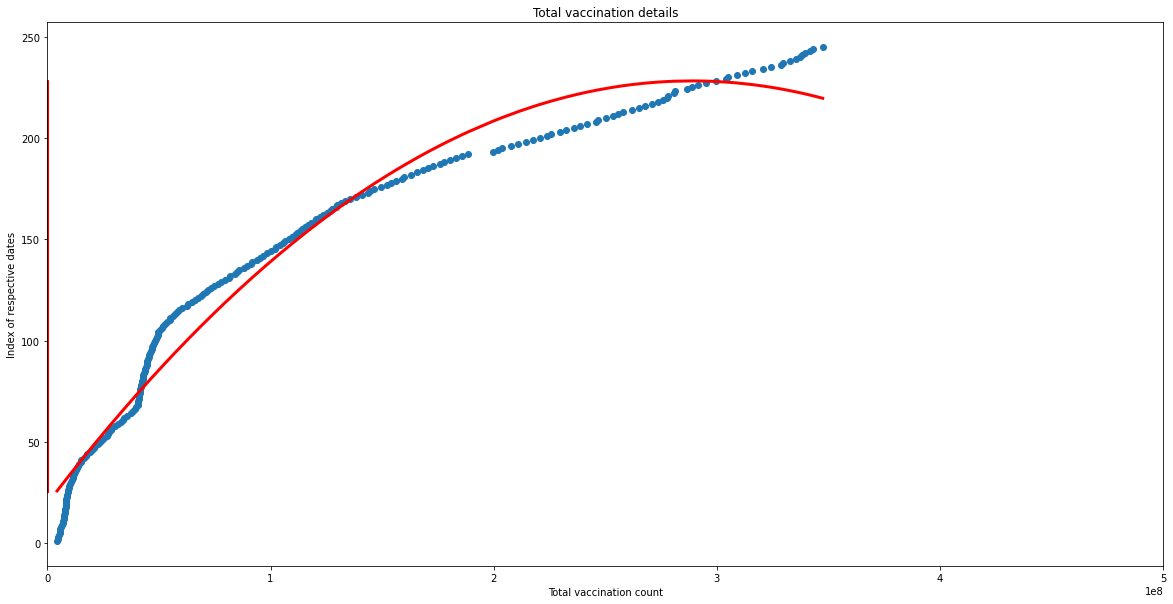

In [247]:
plt.figure(figsize=(20,10))


plt.plot(x_poly, y_pred, color='red', linewidth=3)

plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
plt.xlim()

plt.scatter(X, y, alpha=1)
#plt.ylim()
plt.xlim(0,500000000)
plt.show()

In [248]:
x_prediction_1 = pd.DataFrame([958174818])
x_prediction = polynomial_features.fit_transform(x_prediction_1)
type(x_prediction)

numpy.ndarray

In [249]:
y_pred = regression_model.predict(x_prediction)
y_pred

array([[-892.22499616]])

In [250]:
m1 = regression_model.coef_

In [251]:
c1 = regression_model.intercept_

In [252]:
fully_vaccination_date_poly = start_date + timedelta(int(y_pred))
fully_vaccination_date_poly

datetime.date(2018, 9, 28)

In [253]:
# Decision tree

In [254]:
regression_tree_model = DecisionTreeRegressor(random_state = 0)

In [255]:
regression_tree_model.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [256]:
y_new = regression_tree_model.predict([[668174818]])

In [257]:
y_new

array([245.])